<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.137109  73.445892  47.625332  ...  183.208228  183.208360 -0.000132
      1.0    77.176131  61.552657  96.368892  ...  245.097525  245.097647 -0.000122
      2.0    44.200190  94.240934  28.495448  ...  176.936535  176.936556 -0.000020
      3.0    86.939773  49.714267  47.155688  ...  193.809520  193.809905 -0.000385
      4.0    60.785022  42.068208  84.820274  ...  197.673102  197.673565 -0.000463
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.544015  63.310443  77.353687  ...  207.208038  207.208141 -0.000103
      116.0  58.500439  98.146473  29.941180  ...  196.588214  196.588052  0.000162
      117.0  28.464715  65.199883  50.462313  ...  154.127467  154.126764  0.000703
      118.0  45.399134  24.846920  90.687204  ...  170.933435  170.933217  0.000218
      119.0  87.246410  53.922620  35.379604  ...  186.548120  186.548711 -0.000591

[120000 rows x 7 columns]

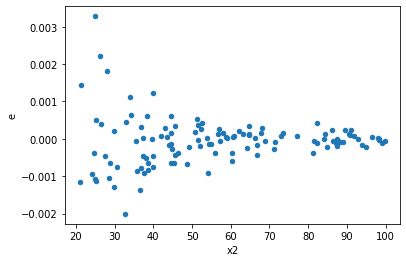

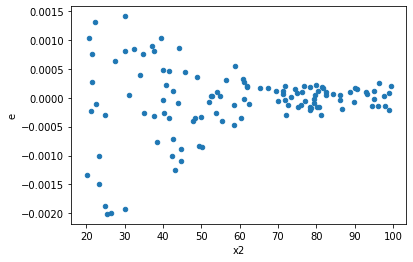

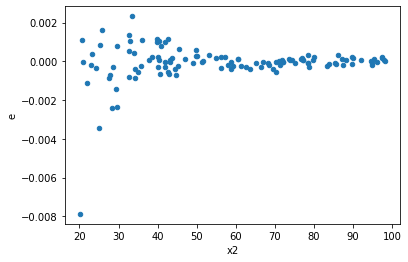

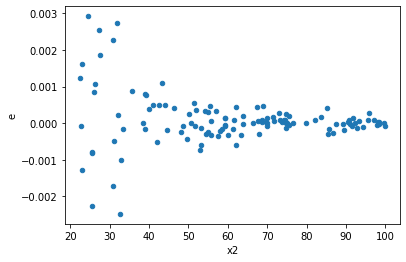

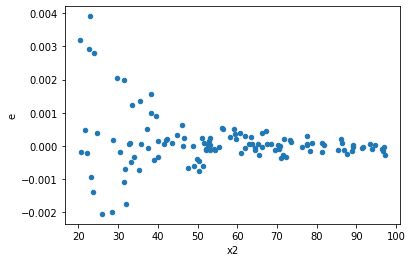

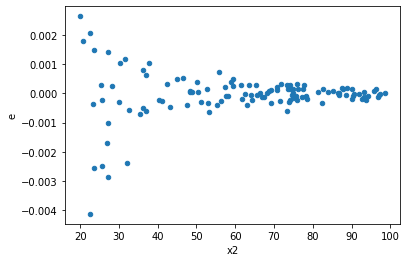

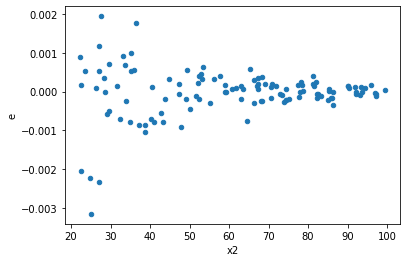

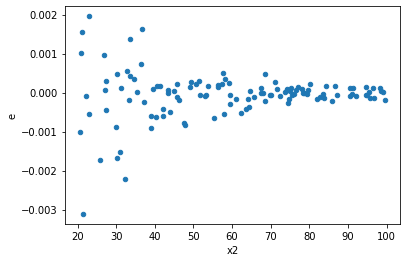

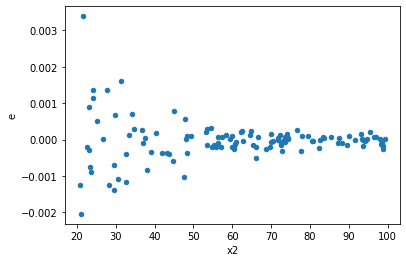

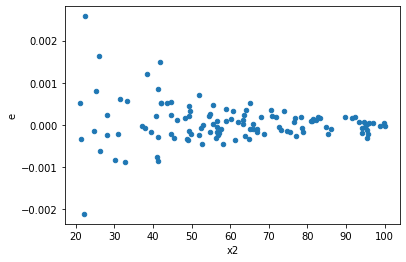

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,54.0,60.0,8.025386929824095e-06,3.907756372688486e-05,1.4861827647822399e-07,6.512927287814144e-07,4.382319215475788,7.098948850980946e-08,0.9999999645052557,3.549474425490473e-08,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,5.488150628146652e-06,4.554403550800007e-05,8.711350203407385e-08,8.930203040784327e-07,10.25122722915139,1.4654943925052066e-14,0.9999999999999927,7.327471962526033e-15,Reject005=0 : Heteroscedasticity
4.0,63.0,51.0,1.0877613304998154e-05,4.45660382705462e-05,1.7266052865076434e-07,8.738438876577687e-07,5.061051848307892,1.858992226821954e-08,0.9999999907050389,9.29496113410977e-09,Reject005=0 : Heteroscedasticity
5.0,59.0,55.0,3.0888784312808626e-06,3.868458749993902e-05,5.235387171662479e-08,7.033561363625277e-07,13.434653699913074,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,57.0,57.0,1.6963025473734958e-06,7.059743758638994e-05,2.97596938135701e-08,1.2385515366033323e-06,41.6184233736493,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,44.0,70.0,6.873270539074941e-06,3.917222359721724e-05,1.5621069406988503e-07,5.596031942459606e-07,3.5823616147279083,1.910920731873489e-06,0.9999990445396341,9.554603659367444e-07,Reject005=0 : Heteroscedasticity
11.0,51.0,63.0,5.11418125505496e-06,3.510284447833842e-05,1.0027806382460706e-07,5.571880075926732e-07,5.556429655116116,4.2011816248077594e-10,0.9999999997899409,2.1005908124038797e-10,Reject005=0 : Heteroscedasticity
14.0,58.0,56.0,1.0731096139642818e-05,6.221345017243612e-05,1.8501889895935894e-07,1.1109544673649307e-06,6.0045458794399265,2.5491986299641667e-10,0.9999999998725401,1.2745993149820833e-10,Reject005=0 : Heteroscedasticity
15.0,54.0,60.0,3.064956046519375e-05,3.7158753654652085e-05,5.675844530591436e-07,6.193125609108681e-07,1.0911372881567183,0.7397247651710401,0.6301376174144799,0.36986238258552007,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,60.0,8.025386929824095e-06,3.907756372688486e-05,1.4861827647822399e-07,6.512927287814144e-07,4.382319215475788,7.098948850980946e-08,Reject005=0 : Heteroscedasticity
1.0,60.0,54.0,2.9735340432351884e-05,2.5331053987639637e-05,4.955890072058647e-07,4.69093592363697e-07,0.9465375251328735,0.8329115645660207,Reject005=1 : Homoscedasticity
2.0,63.0,51.0,5.488150628146652e-06,4.554403550800007e-05,8.711350203407385e-08,8.930203040784327e-07,10.25122722915139,1.4654943925052066e-14,Reject005=0 : Heteroscedasticity
3.0,55.0,59.0,2.8923337227026625e-05,1.6683228537372907e-05,5.258788586732114e-07,2.827665853792018e-07,0.5377028962385365,0.021392320027336372,Reject005=0 : Heteroscedasticity
4.0,63.0,51.0,1.0877613304998154e-05,4.45660382705462e-05,1.7266052865076434e-07,8.738438876577687e-07,5.061051848307892,1.858992226821954e-08,Reject005=0 : Heteroscedasticity
5.0,59.0,55.0,3.0888784312808626e-06,3.868458749993902e-05,5.235387171662479e-08,7.033561363625277e-07,13.434653699913074,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,71.0,43.0,2.1200401467372652e-05,3.758402894133122e-06,2.98597203765812e-07,8.740471846821213e-08,0.2927178063487933,4.488306408639796e-06,Reject005=0 : Heteroscedasticity
7.0,57.0,57.0,1.6963025473734958e-06,7.059743758638994e-05,2.97596938135701e-08,1.2385515366033323e-06,41.6184233736493,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,44.0,70.0,6.873270539074941e-06,3.917222359721724e-05,1.5621069406988503e-07,5.596031942459606e-07,3.5823616147279083,1.910920731873489e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    747
Reject005=1 : Homoscedasticity      253
Name: Result_test, dtype: int64